In [1]:
# install yahoo finance and other modules if not installed before
#%pip install yfinance
#%pip install matplotlib

import yfinance as yf  
import matplotlib.pyplot as plt
from datetime import datetime
import pandas as pd
from pandas.tseries.offsets import DateOffset

[*********************100%***********************]  2 of 2 completed


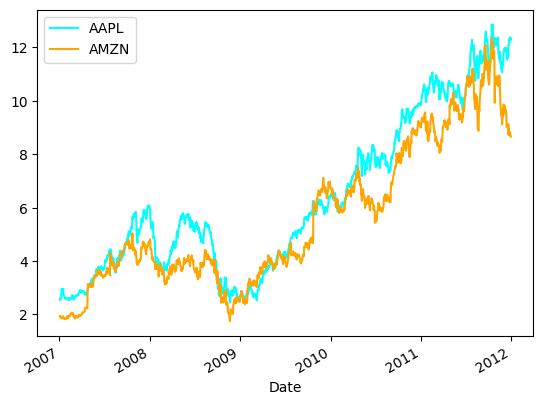

In [2]:
# Get the stock data specifying the stock ticker, start date, and end date
startDate = '2007-01-01'
endDate = '2012-01-01'
data = yf.download(['AMZN', 'AAPL'], startDate, endDate)

# Plot the adjusted close prices
prices = data["Adj Close"]
ax = prices.plot.line(color={'AAPL': 'cyan', 'AMZN': 'orange'})

# Seperate stock data
amazon = prices["AMZN"]
apple = prices["AAPL"]

[*********************100%***********************]  1 of 1 completed


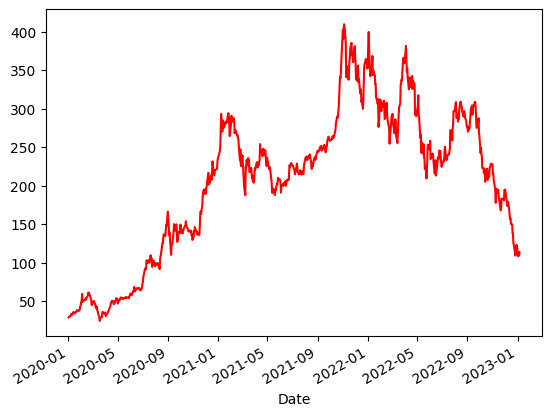

In [3]:
# Get the stock data specifying the stock ticker, start date, and end date
tstartDate = '2020-01-01'
tendDate = datetime.today().strftime('%Y-%m-%d')
data = yf.download(['TSLA'], tstartDate, tendDate)

# Plot the adjusted close prices
tesla = data["Adj Close"]
ax = tesla.plot.line(color='red')

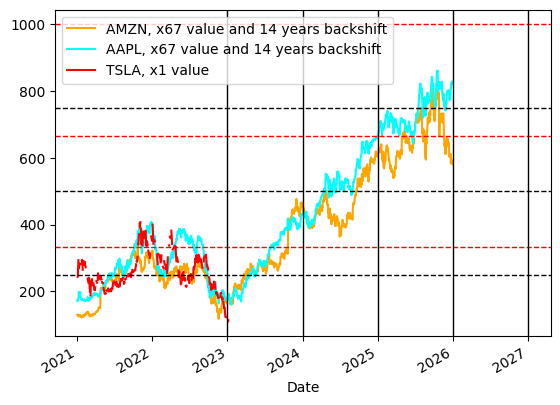

In [4]:
# Amazon: Offset back in X years and T times magnified
offsetByYears = 14
magnifyBy = 67
if magnifyBy == 1:
    amazonModName = "AMZN, " + str(offsetByYears) + " years backshift"
else:
    amazonModName = "AMZN, x" + str(magnifyBy) + " value and " + str(offsetByYears) + " years backshift"
amazonMod = pd.Series(data = amazon.values * magnifyBy, index = amazon.index + DateOffset(years=offsetByYears), name = amazonModName)

# Apple: Offset back in X years and T times magnified
offsetByYears = 14
magnifyBy = 67
if magnifyBy == 1:
    appleModName = "AAPL, " + str(offsetByYears) + " years backshift"
else:
    appleModName = "AAPL, x" + str(magnifyBy) + " value and " + str(offsetByYears) + " years backshift"
appleMod = pd.Series(data = apple.values * magnifyBy, index = apple.index + DateOffset(years=offsetByYears), name = appleModName)

# Tesla: Current value and T times
tesla.name = "TSLA, current value"
magnifyBy = 1
if magnifyBy < 1:
    teslaModName = "TSLA, 1/" + str(1/magnifyBy) + " value"
else:
    teslaModName = "TSLA, x" + str(magnifyBy) + " value"
teslaMod = pd.Series(data = tesla.values * magnifyBy, index = tesla.index, name = teslaModName)

# Combine all back
a = pd.DataFrame(amazonMod)
b = a.join(appleMod)
compare = b.join(teslaMod)
ax = compare.plot.line(color={appleModName: "cyan", amazonModName: "orange", teslaModName: "red"})

# Draw lines for target sells
plt.axhline(333, color='red', linestyle='--', lw=1)
plt.axhline(666, color='red', linestyle='--', lw=1)
plt.axhline(1000, color='red', linestyle='--', lw=1)

# Draw lines for intermediate price points
plt.axhline(250, color='black', linestyle='--', lw=1)
plt.axhline(500, color='black', linestyle='--', lw=1)
plt.axhline(750, color='black', linestyle='--', lw=1)

# Draw line for years
plt.axvline('2023-01-01', color='black', lw=1)
plt.axvline('2024-01-01', color='black', lw=1)
plt.axvline('2025-01-01', color='black', lw=1)
plt.axvline('2026-01-01', color='black', lw=1)
plt.axvline('2027-01-01', color='black', lw=1)

# Plot and print to pdf and jpg
plt.savefig('TSLA22crashvsAMZNAPPL09_in' + str(offsetByYears) + 'years@' + tendDate + '.pdf', dpi=300, bbox_inches='tight')
plt.savefig('TSLA22crashvsAMZNAPPL09_in' + str(offsetByYears) + 'years@' + tendDate + '.png')

In [5]:
# For Excel export, first install openpyxl if not previously
#%pip install openpyxl

# import openpyxl
compare.to_excel('TSLA22crashvsAMZNAPPL09_in' + str(offsetByYears) + 'years@' + tendDate + '.xlsx')